In [1]:
import matplotlib as mpl
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_48233/616493249.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [2]:
wkdir = [
    # "/Users/yao/Desktop/DPM_5e-2_Si150nm_Al50nm/",
    # '/Volumes/LaCie/Apollon_Neutron_2022_2023/DPM_5e-2_Si150nm_Al50nm_t02',
    # '/Volumes/LaCie/Apollon_Neutron_2022_2023/DPM_5e-2_Si150nm_Al50nm_t03',
    # '/Users/yao/Desktop/DPM_5e-2_Si150nm_Al50nm_t04/',
    '/Volumes/LaCie/Apollon_Neutron_2022_2023/DPM_Si150nm_Al50nm_t07/',
    ]

In [3]:
S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.*np.pi*3e8/1.058e-6)


Loaded simulation '/Volumes/LaCie/Apollon_Neutron_2022_2023/DPM_Si150nm_Al50nm_t07/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics


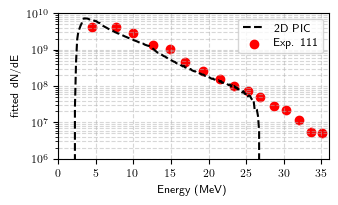

In [22]:
# energy spectrum from screen vs. experimental data

plt.rc('font', family='sans-serif', serif='Arial')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

width  = 3.487
height = width / 1.618


yrange = 'all'
# yrange = [22.76*S0.namelist.l0, 50*S0.namelist.l0]
# yrange = [20*S0.namelist.l0, 50*S0.namelist.l0]

ene = S0.Screen(2, units=['um','fs','MeV'],sum={'y':yrange},).getData()
xx  = S0.Screen(2, units=['um','fs','MeV'],sum={'y':yrange},).getAxis('ekin')
tt  = S0.Screen(2, units=['um','fs','MeV'],sum={'y':yrange},).getTimes()

fitting_factor = 9e11 * 5

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)


ax.semilogy(xx,ene[-1]*fitting_factor, color='black',
             linestyle='--',
             # label='PIC at t = {:.1f} fs'.format(tt[-1]),
            label='2D PIC',
           )
# plt.semilogy(xx,ene[ts[1]]*fitting_factor, color='black',
#              label='2D PIC at t = '+str(round(tt[ts[1]]))+' fs')

ax.set_xlim([0,36])
ax.set_ylim([1e6,1e10])
# plt.title('time = '+str(tt[ts])+' fs')
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('fitted dN/dE')

#shot 115
# exp_energy = np.array([4.47, 7.42, 9.55, 11.92, 13.71, 15.12])
# exp_number = np.array([2.263e9, 1.185e9, 5.523e8, 1.790e8, 5.399e7, 3.149e7])

#shot 111
exp_energy = np.array([4.49, 7.74, 10.01, 12.67, 14.87, 16.88, 19.33, 21.47, 23.42, 25.23, 26.90, 28.75, 30.37, 32.03, 33.67, 35.17])
exp_number = np.array([4.333e9, 4.103e9, 2.892e9, 1.386e9, 1.074e9, 4.606e8, 2.639e8, 1.605e8, 9.902e7, 7.454e7, 4.993e7, 2.849e7, 2.184e7, 1.170e7, 5.565e6, 5.165e6])
ax.scatter(exp_energy, exp_number, color='red', marker='o',
            s=36,
            label='Exp. 111')
ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()

In [20]:
fig.savefig('/Users/yao/Desktop/spectrum.pdf')

In [ ]:
# energy spectrum from screen vs. experimental data

ene = S0.Screen(0, units=['um','fs','MeV']).getData()
xx  = S0.Screen(0, units=['um','fs','MeV']).getAxis('ekin')
tt  = S0.Screen(0, units=['um','fs','MeV']).getTimes()

fitting_factor = 9e11

plt.semilogy(xx,ene[-1]*fitting_factor, color='black',
             linestyle='--',
             label='2D PIC at t = '+str(tt[-1])+' fs')
# plt.semilogy(xx,ene[ts[1]]*fitting_factor, color='black',
#              label='2D PIC at t = '+str(round(tt[ts[1]]))+' fs')

plt.xlim([0,35])
# plt.ylim([1e-7,1])
# plt.title('time = '+str(tt[ts])+' fs')
plt.grid(which='both',linestyle='--',alpha=0.5)
plt.xlabel('Energy (MeV)')
plt.ylabel('fitted dN/dE')

#shot 115
# exp_energy = np.array([4.47, 7.42, 9.55, 11.92, 13.71, 15.12])
# exp_number = np.array([2.263e9, 1.185e9, 5.523e8, 1.790e8, 5.399e7, 3.149e7])

#shot 111
exp_energy = np.array([4.49, 7.74, 10.01, 12.67, 14.87, 16.88, 19.33, 21.47, 23.42, 25.23, 26.90, 28.75, 30.37, 32.03, 33.67, 35.17])
exp_number = np.array([4.333e9, 4.103e9, 2.892e9, 1.386e9, 1.074e9, 4.606e8, 2.639e8, 1.605e8, 9.902e7, 7.454e7, 4.993e7, 2.849e7, 2.184e7, 1.170e7, 5.565e6, 5.165e6])
plt.scatter(exp_energy, exp_number, color='red', marker='*',
            s=72,
            label='Experiment #111')
plt.legend()

plt.show()

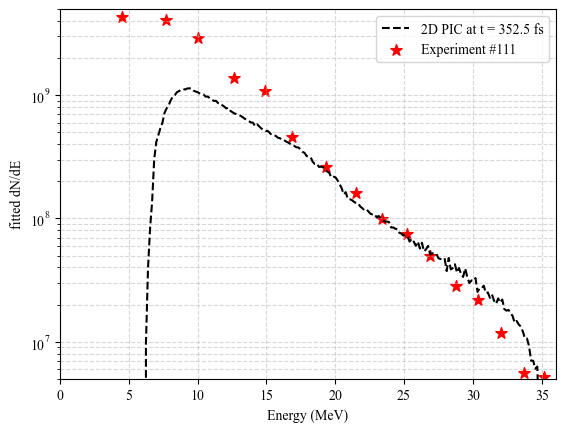

In [37]:
fig.savefig('/Users/yao/Desktop/spectrum.png',dpi=600)

NameError: name 'fig' is not defined

In [ ]:
# energy spectrum from Particle Bin vs. experimental data

ene = np.array(S0.ParticleBinning(3, units=['um','fs','MeV']).getData())
xx  = np.array(S0.ParticleBinning(3, units=['um','fs','MeV']).getAxis('ekin'))
tt  = np.array(S0.ParticleBinning(3, units=['um','fs','MeV']).getTimes())

fitting_factor = 9e11
timestep = 103 #93

plt.semilogy(xx,ene[timestep]*fitting_factor, color='black',
             linestyle='--',
             label='2D PIC at t = '+str(tt[-1])+' fs')
# plt.semilogy(xx,ene[ts[1]]*fitting_factor, color='black',
#              label='2D PIC at t = '+str(round(tt[ts[1]]))+' fs')

# plt.xlim([0,40])
# plt.ylim([1e-7,1])
# plt.title('time = '+str(tt[ts])+' fs')
plt.grid(which='both',linestyle='--',alpha=0.5)
plt.xlabel('Energy (MeV)')
plt.ylabel('fitted dN/dE')

#shot 115
# exp_energy = np.array([4.47, 7.42, 9.55, 11.92, 13.71, 15.12])
# exp_number = np.array([2.263e9, 1.185e9, 5.523e8, 1.790e8, 5.399e7, 3.149e7])

#shot 111
exp_energy = np.array([4.49, 7.74, 10.01, 12.67, 14.87, 16.88, 19.33, 21.47, 23.42, 25.23, 26.90, 28.75, 30.37, 32.03, 33.67, 35.17])
exp_number = np.array([4.333e9, 4.103e9, 2.892e9, 1.386e9, 1.074e9, 4.606e8, 2.639e8, 1.605e8, 9.902e7, 7.454e7, 4.993e7, 2.849e7, 2.184e7, 1.170e7, 5.565e6, 5.165e6])
plt.scatter(exp_energy, exp_number, color='red', marker='*',
            s=72,
            label='Experiment #111')
plt.legend()

plt.show()

In [ ]:
ene = np.array(ene)

In [ ]:
tt[93]


#0 - Number density of species # 2
    ekin from 0.391389 to 117.417 in 1000 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:868: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )


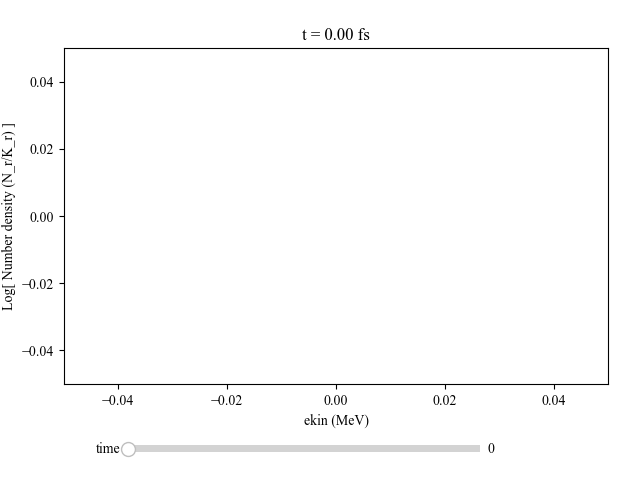

In [4]:
#%% energy spectrum of H from screen 
%matplotlib widget
xmin0 = 2
xmax0 = 20.0
vmin0 = -6
vmax0 = -3

ene10 = S0.Screen(0, units=['um','fs','MeV'],
                  data_log=True,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                    # vmin=vmin0,
                   # vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()

In [ ]:
#%% px-py distribution for H from screen
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.Screen(1, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [5]:
#%% energy spectrum of H from screen with resolution in y
%matplotlib widget
xmin0 = 2
xmax0 = 20.0
vmin0 = -5
vmax0 = -2

ene10 = S0.Screen(2, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                  # sum={'y':'all'},
                    vmin=vmin0,
                   vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()


#2 - Number density of species # 2
    ekin from 0.391389 to 117.417 in 400 steps 
    y from 25.1327 to 226.195 in 200 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0]



In [ ]:
#%% energy spectrum of eon from screen to the right
%matplotlib widget
xmin0 = 2
xmax0 = 20.0
vmin0 = -6
vmax0 = -3

ene10 = S0.Screen(3, units=['um','fs','MeV'],
                  data_log=True,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                    # vmin=vmin0,
                   # vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()

In [ ]:
#%% energy spectrum of eon from screen to the left
%matplotlib widget
xmin0 = 2
xmax0 = 20.0
vmin0 = -6
vmax0 = -3

ene10 = S0.Screen(4, units=['um','fs','MeV'],
                  data_log=True,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                    # vmin=vmin0,
                   # vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()

In [ ]:
#%% px-py distribution for eon
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.Screen(5, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% angular vs. energy distribution for H from screen
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.Screen(6, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% angular vs. energy distribution for eon from screen
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.Screen(7, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% x-px distribution for H
%matplotlib widget
vmin0 = -6
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(0, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% density distribution for H
%matplotlib widget
vmin0 = 18
vmax0 = 23
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(1, units=['um','fs','MeV','cm^-3'],
                  data_log=True,
                  cmap=newcmap,
                           aspect='equal',
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% px-py distribution for H
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(2, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% energy spectrum of H from Particle Bin 
%matplotlib widget
xmin0 = 2
xmax0 = 20.0
vmin0 = -6
vmax0 = -3

ene10 = S0.ParticleBinning(3, units=['um','fs','MeV'],
                  data_log=True,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                    # vmin=vmin0,
                   # vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()

In [ ]:
#%% x-px distribution for eon
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(4, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% density distribution for eon
%matplotlib widget
vmin0 = 17
vmax0 = 23
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(5, units=['um','fs','MeV','cm^-3'],
                  data_log=True,
                  cmap=newcmap,
                           aspect='equal',
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% px-py distribution for eon
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(6, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% energy spectrum of eon from Particle Bin 
%matplotlib widget
xmin0 = 2
xmax0 = 20.0
vmin0 = -6
vmax0 = -3

ene10 = S0.ParticleBinning(7, units=['um','fs','MeV'],
                  data_log=True,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                    # vmin=vmin0,
                   # vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()

In [ ]:
#%% angular vs. energy distribution for H
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(8, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% angular vs. energy distribution for eon
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(9, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% xy vs. energy distribution for eon
%matplotlib widget
vmin0 = 18
vmax0 = 23
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(10, units=['um','fs','MeV','cm^-3 MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                           sum={'ekin':[0.1/0.511]},
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
%matplotlib widget
vsym0 = 1e12

Ey10 = S0.Field(1, 'Ex', units=['um','fs','V/m'],
                # vsym=True,
                vsym=vsym0,
                aspect='equal',
                ).slide()

In [ ]:
%matplotlib widget
vsym0 = 1e12

Ey10 = S0.Field(1, 'Ex', units=['um','fs','V/m'],
                # vsym=True,
                vsym=vsym0,
                aspect='equal',
                ).slide()

In [ ]:
qe = 1.6e-19
E  = 1e12
l  = 1e-6
ene = qe*E*l / qe /1e6
print('ene = {:.2e} MeV'.format(ene))

In [ ]:
np.arctan2(-1,1) * 180 / np.pi